In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("student_academic_success.csv", sep=";").dropna()
target_col = "Target"

df_x = df.drop(target_col, axis=1)
df_y_multi = df[target_col]

df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y_multi, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1: {f1}")

Accuracy: 0.6587570621468927, Precision: 0.6172832041509878, Recall: 0.6587570621468927, F1: 0.6027611703525605


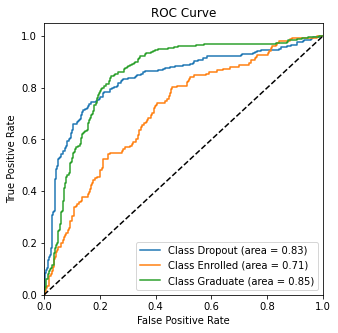

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

##############################################
# ROC Curve
##############################################
y_pred_proba = clf.predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == clf.classes_[i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test == clf.classes_[i], y_pred_proba[:, i])

for i in range(len(clf.classes_)):
    axs.plot(fpr[i], tpr[i], label=f'Class {clf.classes_[i]} (area = {roc_auc[i]:.2f})')

axs.plot([0, 1], [0, 1], 'k--')
axs.set_xlim([0.0, 1.0])
axs.set_ylim([0.0, 1.05])
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')
axs.set_title('ROC Curve')
axs.legend(loc="lower right")
plt.show()

In [5]:
print(f"Percent of values in each class for y_test {y_test.value_counts(normalize=True)}")

print(f"Percent of values in each class for y_pred\n{pd.Series(y_pred).value_counts(normalize=True)}")

print(f"Percent of values in each class for y_train {y_train.value_counts(normalize=True)}")

Percent of values in each class for y_test Graduate    0.472316
Dropout     0.357062
Enrolled    0.170621
Name: Target, dtype: float64
Percent of values in each class for y_pred
Graduate    0.700565
Dropout     0.280226
Enrolled    0.019209
dtype: float64
Percent of values in each class for y_train Graduate    0.506075
Dropout     0.312235
Enrolled    0.181690
Name: Target, dtype: float64


In [6]:
df = pd.read_csv("student_academic_success.csv", sep=";").dropna()
target_col = "Target"

print(len(df), df[target_col].value_counts())
df = df.groupby(target_col).apply(lambda x: x.sample(n=794, random_state=42)).reset_index(drop=True)
print(len(df), df[target_col].value_counts())

df_x = df.drop(target_col, axis=1)
df_y_multi = df[target_col]

df

4424 Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64
2382 Dropout     794
Enrolled    794
Graduate    794
Name: Target, dtype: int64


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,5,9853,1,1,141.0,1,37,19,...,0,6,12,5,10.400000,0,9.4,-0.8,-3.12,Dropout
1,1,17,2,9085,1,1,133.1,1,19,38,...,0,6,19,2,13.500000,0,12.4,0.5,1.79,Dropout
2,2,1,4,8014,0,1,140.0,1,34,34,...,0,6,0,0,0.000000,0,9.4,-0.8,-3.12,Dropout
3,1,44,1,9130,1,39,130.0,1,1,3,...,1,6,12,1,13.000000,0,13.9,-0.3,0.79,Dropout
4,2,39,1,9003,1,1,168.0,1,1,41,...,0,6,0,0,0.000000,0,12.4,0.5,1.79,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,1,17,5,9119,1,1,124.0,11,4,12,...,0,5,5,5,17.600000,0,8.9,1.4,3.51,Graduate
2378,1,1,3,9500,1,1,141.0,1,19,19,...,0,8,11,8,12.331250,0,15.5,2.8,-4.06,Graduate
2379,1,1,1,9853,1,1,115.0,1,19,38,...,0,7,7,7,13.285714,0,12.4,0.5,1.79,Graduate
2380,5,7,1,9147,1,40,110.0,1,37,37,...,5,10,10,7,11.142857,0,15.5,2.8,-4.06,Graduate


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y_multi, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1: {f1}")

Accuracy: 0.589098532494759, Precision: 0.5958090010020095, Recall: 0.589098532494759, F1: 0.5898064051172619


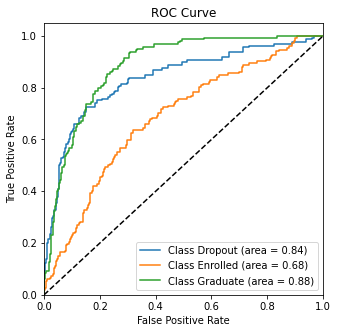

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

##############################################
# ROC Curve
##############################################
y_pred_proba = clf.predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == clf.classes_[i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test == clf.classes_[i], y_pred_proba[:, i])

for i in range(len(clf.classes_)):
    axs.plot(fpr[i], tpr[i], label=f'Class {clf.classes_[i]} (area = {roc_auc[i]:.2f})')

axs.plot([0, 1], [0, 1], 'k--')
axs.set_xlim([0.0, 1.0])
axs.set_ylim([0.0, 1.05])
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')
axs.set_title('ROC Curve')
axs.legend(loc="lower right")
plt.show()